In [28]:
import fireducks.pandas as pd
import numpy as np

In [29]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [30]:
df_train = df_train.dropna()

In [31]:
def simpleProcessing(df_here):
    # 1. Convert date to datetime
    df_here['date'] = pd.to_datetime(df_here['date'])
    # 2. Log transformation for num_sold
    df_here['num_sold'] = df_here['num_sold'].apply(lambda x: np.log1p(x))
    return df_here

In [32]:
def addingVariables(df_here):
    # Convert date and add essential time features
    df_here['date'] = pd.to_datetime(df_here['date'])
    df_here['year'] = df_here['date'].dt.year
    df_here['month'] = df_here['date'].dt.month
    df_here['day_of_week'] = df_here['date'].dt.dayofweek
    df_here['is_weekend'] = (df_here['day_of_week'] >= 5).astype(int)
    # Store/Product averages (very powerful for sales data)
    store_avg = df_here.groupby('store')['num_sold'].mean().to_dict()
    product_avg = df_here.groupby('product')['num_sold'].mean().to_dict()

    df_here['store_avg_performance'] = df_here['store'].map(store_avg)
    df_here['product_avg_performance'] = df_here['product'].map(product_avg)
    
    return df_here  # Return the modified dataframe

In [33]:
def oneHotEncoding(df_here, columns_to_encode=['country', 'store', 'product']):
    # Apply one-hot encoding and remove original columns
    df_here = pd.get_dummies(df_here, columns=columns_to_encode, drop_first=True)
    return df_here


In [34]:
df_train = simpleProcessing(df_train)
df_train = addingVariables(df_train)
df_train = oneHotEncoding(df_train)

print("All preprocessing completed!")
print(f"Final dataframe shape: {df_train.shape}")
print(f"Columns: {list(df_train.columns)}")

All preprocessing completed!
Final dataframe shape: (221259, 20)
Columns: ['id', 'date', 'num_sold', 'year', 'month', 'day_of_week', 'is_weekend', 'store_avg_performance', 'product_avg_performance', 'country_Finland', 'country_Italy', 'country_Kenya', 'country_Norway', 'country_Singapore', 'store_Premium Sticker Mart', 'store_Stickers for Less', 'product_Kaggle', 'product_Kaggle Tiers', 'product_Kerneler', 'product_Kerneler Dark Mode']


In [35]:
df_train.head()

,id,date,num_sold,year,month,day_of_week,is_weekend,store_avg_performance,product_avg_performance,country_Finland,country_Italy,country_Kenya,country_Norway,country_Singapore,store_Premium Sticker Mart,store_Stickers for Less,product_Kaggle,product_Kaggle Tiers,product_Kerneler,product_Kerneler Dark Mode
1,1,2010-01-01,6.881411,2010,1,4,0,5.483425,6.540707,False,False,False,False,False,False,False,True,False,False,False
2,2,2010-01-01,6.810142,2010,1,4,0,5.483425,6.350640,False,False,False,False,False,False,False,False,True,False,False
3,3,2010-01-01,6.049733,2010,1,4,0,5.483425,5.749520,False,False,False,False,False,False,False,False,False,True,False
4,4,2010-01-01,6.198479,2010,1,4,0,5.483425,5.895331,False,False,False,False,False,False,False,False,False,False,True
5,5,2010-01-01,5.707110,2010,1,4,0,6.097865,4.967694,False,False,False,False,False,False,True,False,False,False,False


In [36]:
df_train = df_train.drop(columns=['date'])
df_train = df_train.drop(columns=['id'])

### Train-Test Split

In [37]:
df_train.head()

,num_sold,year,month,day_of_week,is_weekend,store_avg_performance,product_avg_performance,country_Finland,country_Italy,country_Kenya,country_Norway,country_Singapore,store_Premium Sticker Mart,store_Stickers for Less,product_Kaggle,product_Kaggle Tiers,product_Kerneler,product_Kerneler Dark Mode
1,6.881411,2010,1,4,0,5.483425,6.540707,False,False,False,False,False,False,False,True,False,False,False
2,6.810142,2010,1,4,0,5.483425,6.350640,False,False,False,False,False,False,False,False,True,False,False
3,6.049733,2010,1,4,0,5.483425,5.749520,False,False,False,False,False,False,False,False,False,True,False
4,6.198479,2010,1,4,0,5.483425,5.895331,False,False,False,False,False,False,False,False,False,False,True
5,5.707110,2010,1,4,0,6.097865,4.967694,False,False,False,False,False,False,True,False,False,False,False


In [38]:
from sklearn.model_selection import train_test_split

# Train Test Split
# Define features and target
features = [col for col in df_train.columns if col != 'num_sold']
target = 'num_sold'

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_train[features], df_train[target], test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (177007, 17)
X_test shape: (44252, 17)
y_train shape: (177007,)
y_test shape: (44252,)


In [39]:
X_train.head()

,year,month,day_of_week,is_weekend,store_avg_performance,product_avg_performance,country_Finland,country_Italy,country_Kenya,country_Norway,country_Singapore,store_Premium Sticker Mart,store_Stickers for Less,product_Kaggle,product_Kaggle Tiers,product_Kerneler,product_Kerneler Dark Mode
109844,2013,5,6,1,6.211109,5.895331,False,True,False,False,False,True,False,False,False,False,True
36903,2011,2,1,0,5.483425,5.749520,False,False,False,False,False,False,False,False,False,True,False
8583,2010,4,1,0,5.483425,5.749520,False,True,False,False,False,False,False,False,False,True,False
55231,2011,9,1,0,5.483425,6.540707,False,False,False,True,False,False,False,True,False,False,False
120919,2013,9,3,0,5.483425,5.895331,False,False,True,False,False,False,False,False,False,False,True


### 1. XGBoost

In [42]:
# Install and import XGBoost
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def calculate_mape(y_true, y_pred):
    """Calculate Mean Absolute Percentage Error (MAPE)"""
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print("XGBoost version:", xgb.__version__)

XGBoost version: 3.0.5


In [43]:
# Initialize and train XGBoost model
xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    n_jobs=-1
)

# Train the model
print("Training XGBoost model...")
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

print("XGBoost model trained successfully!")

Training XGBoost model...
XGBoost model trained successfully!


In [44]:
# Evaluate model performance with MAPE
# Note: Since we used log transformation, we need to convert back to original scale for MAPE
y_test_original = np.expm1(y_test)  # Convert back from log scale
y_pred_original = np.expm1(y_pred)  # Convert back from log scale

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

# Calculate MAPE on original scale
mape = calculate_mape(y_test_original, y_pred_original)

print("Model Performance Metrics:")
print(f"RMSE (log scale): {rmse:.4f}")
print(f"MAE (log scale): {mae:.4f}")
print(f"R² (log scale): {r2:.4f}")
print(f"MAPE (original scale): {mape:.2f}%")

print(f"\nActual vs Predicted (first 10 samples, original scale):")
for i in range(min(10, len(y_test_original))):
    print(f"Actual: {y_test_original.iloc[i]:.2f}, Predicted: {y_pred_original[i]:.2f}")

Model Performance Metrics:
RMSE (log scale): 0.0724
MAE (log scale): 0.0553
R² (log scale): 0.9977
MAPE (original scale): 5.58%

Actual vs Predicted (first 10 samples, original scale):
Actual: 1486.00, Predicted: 1283.98
Actual: 1015.00, Predicted: 1142.78
Actual: 362.00, Predicted: 327.34
Actual: 5.00, Predicted: 5.08
Actual: 586.00, Predicted: 632.76
Actual: 1093.00, Predicted: 1197.05
Actual: 2831.00, Predicted: 2547.29
Actual: 10.00, Predicted: 9.65
Actual: 605.00, Predicted: 574.51
Actual: 7.00, Predicted: 7.53


Top 10 Most Important Features:
                       feature  importance
8                country_Kenya    0.882596
5      product_avg_performance    0.048699
4        store_avg_performance    0.027418
9               country_Norway    0.026533
7                country_Italy    0.010141
10           country_Singapore    0.001285
2                  day_of_week    0.001003
0                         year    0.000612
16  product_Kerneler Dark Mode    0.000532
1                        month    0.000486


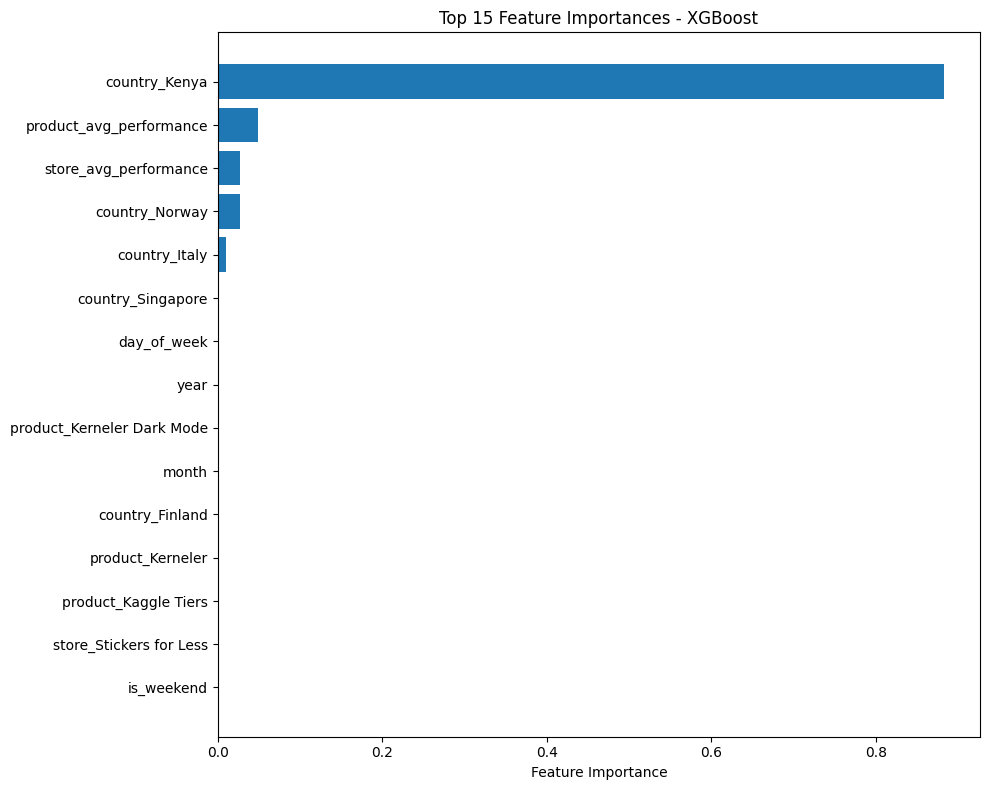

In [45]:
# Feature importance analysis
import matplotlib.pyplot as plt

feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 10 Most Important Features:")
print(feature_importance.head(10))

# Plot feature importance
plt.figure(figsize=(10, 8))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Feature Importance')
plt.title('Top 15 Feature Importances - XGBoost')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()